# Introduction to Quantum Computing
Quantum computing is a field of study that uses principles of quantum theory to develop computer technology. Quantum theory is *"the area of physics that explains how matter and energy behave at the atomic and subatomic level"*. 

Quantum computing differs from classical computers in many ways.

|                               | Classical Computers                           | Quantum Computers                                             |
| :---                          | :---                                          | :---                                                          |
| **Unit of Information**       | Bits                                          | Qubits                                                        |
| **Superposition**             | No superposition (0 or 1 state)               | Superposition of 0 and 1 states simultaneously                |
| **Entanglement**              | Independent bits                              | Entangled qubits                                              |
| **Gates**                     | Classical logic gates (AND, OR, NOT)          | Quantum gates (manipulate qubits quantum states)              |
| **Processing Model**          | Sequential processing                         | Parallel processing, exploring multiple possibilities         |
| **Complexity and Speed**      | Efficient for general problems                | Exponential speedup for specific problems                     |
| **Error Sensitivity**         | Relatively stable                             | Susceptible to errors, active research on error correction    |

## Qubits
Classical bits can only be in two states: 1 and 0. Qubits on the other hand can have multiple states at once thanks to a property called *superposition*. Superposition allows quantum systems to process a large amount of information at once.

Here are the possible states of a qubit:
$$
\begin{array}{c|cc}
& 0&1 \\
\hline
0 & 00&01 \\
1 & 10&11
\end{array}
$$

As you can see we can have multiple states at the same time, this lets qubits represent more information than a classical bit. 

Here are the possible states of a classical bit:

$$
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$$


## Comparing Bits and Qubits

|                      | **Bits**                    | **Qubits**                                          |
| :---                 | :---                        | :---                                                |
| **States**           | Can be 0 or 1               | Can be 0, 1, or both 0 and 1 at the same exact time |
| **Processing Power** | Linear processing, 0(n)     | Exponential processing because of superposition     |
| **Parallelism**      | Process tasks sequentially  | Parallel processing due to superposition            |
| **Complexity**       | Straightforward logic gates | Complex quantum operations                          |
| **Sensitivity**      | Stable, not quantum         | Highly sensitive to the environment                 |



## Quantum Gates
Quantum gates can measure and change the superposition state of qubits. This allows for parallel processing of multiple different possibilities, whereas the logic gates have only a possibility of returning a 0 or 1. Quantum gates can alter the entanglement of qubits which means one qubit's superposition can be related to another one even if they are physically separate

A quantum logic gate is represented using matrices where for n qubits the matrix is: 
$$2^n\times 2^n$$

An example of a quantum gate is a Hadamard gate. The Hadamard gate is one of the most fundamental gates in quantum computing. It is often denoted by the letter H. The Hadamard gate operates on a single qubit and is typically used to create superposition. This means that when this gate is applied to a qubit in a state of |0) or |1), the gate transforms it into an equal superposition of |0) and |1)

|0) and |1) are the representations of the state of a qubit in quantum computing. These indicate that if a qubit in the state of |0) has a probability of 100% to have the value 0, the same goes for |1)

The Hadamard gate can be represented by the following matrix:
$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$




## Generating circuits
This basic circuit consists of two qubits. 
One H gate in the first qubit and a CNOT gate going through both.

In [8]:
# Importing libraries for generating the circuits
from qiskit import Aer, transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram

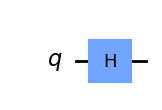

In [9]:
circ = QuantumCircuit(1) # Generate a circuit with one qubits
circ.h(0) # Add a H gate to the first qubit
circ.draw('mpl', style="clifford") # Draw the circuit

## Getting the Result of the Circuit

Bell-State counts can help us calculate the results of running this circuit. These counts provide information about the probabilities of different measurement results and allow us to infer the entanglement and correlations between the qubits.

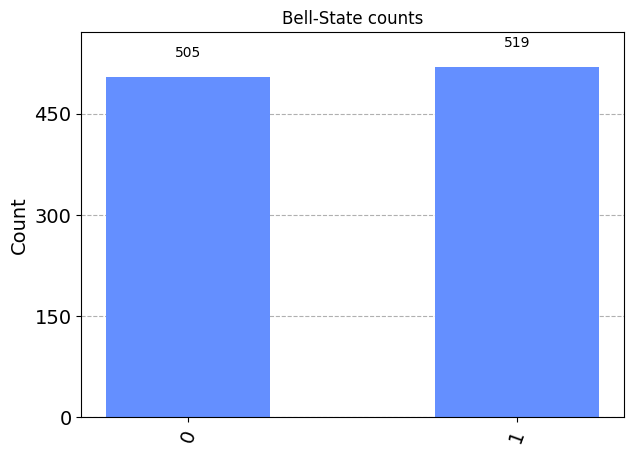

In [10]:
circ.measure_all()
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

# Deautsch's Algorithm

Deutsch's algorithm is one of the earliest and simplest quantum algorithms that demonstrates the power of quantum computing in solving certain types of problems more efficiently than classical computers. It was proposed by David Deutsch in 1985 and is often considered a foundational algorithm in quantum computing.

## Deutsch's Problem
The problem that Deutsch's algorithm addresses is known as the Deutsch problem, which is an example of a black-box problem. In this problem, we are given a black box that performs an unknown function on n-bits. The function takes a binary input (0 or 1) and produces a binary output (0 or 1). The goal is to determine whether the function is constant (output is the same for both input values) or balanced (output is different for the two input values) by making as few function evaluations as possible.
 
Deutsch's algorithm solves this problem using only one function evaluation. In the classical setting, at least two function evaluations are required to distinguish between a constant and a balanced function. However, Deutsch's algorithm exploits quantum parallelism and interference to determine the nature of the function in a single evaluation.

The algorithm starts with two qubits, one in the state |0⟩ and the other in the state |1⟩, representing the input to the black box. It then applies a series of quantum gates, including a Hadamard gate and an oracle gate that performs an unknown function. The algorithm applies further gates to extract the result and finally measures the first qubit to obtain the outcome.

After the measurement, Deutsch's algorithm can determine whether the function is constant or balanced by analyzing the measurement result. Remarkably, the algorithm correctly identifies the nature of the function with only a single function evaluation, making it exponentially more efficient than classical algorithms for solving this specific problem.

Deutsch's algorithm serves as a crucial demonstration of the advantage of quantum computing in terms of solving certain problems more efficiently. While it may not have immediate practical applications, it lays the foundation for more advanced quantum algorithms and showcases the unique capabilities of quantum computers.


## Constant and Balanced Functions

### Classical Computing
A balanced function in classical computing is one that returns the same amount of 0s and 1s. An example would be the XOR gate. 
| Input 1 | Input 2 | Output |
|:-------:|:-------:|:------:|
|    0    |    0    |   0    |
|    0    |    1    |   1    |
|    1    |    0    |   1    |
|    1    |    1    |   0    |

A constant function in classical computing is one that returns the same result each time. An example would be the NOT gate.
| Input 1 | Input 2 | Output |
|:-------:|:-------:|:------:|
|    0    |    0    |   0    |
|    0    |    1    |   0    |
|    1    |    0    |   0    |
|    1    |    1    |   0    |



## Algorithm Implementation

In [11]:
def deutsch_algorithm(oracle_type):
    # Create a 2-qubit quantum circuit
    q0 = QuantumRegister(1)
    q1 = QuantumRegister(1)
    # Create a classical bit to store results
    c = ClassicalRegister(1)

    qc = QuantumCircuit(q0, q1, c)

    # Apply the x gate to flip the second qubit to a state of |1⟩
    qc.x(q1)  

    qc.barrier()

    # Apply the Hadamard gate to both qubits
    qc.h(q0) 
    qc.h(q1)

    qc.barrier()

    # Apply the oracle
    if oracle_type == 'balanced':
        qc.cx(q0, q1)  # Apply CNOT gate to balanced oracle
    elif oracle_type == 'constant':
        print() # Do nothing to a constant function

    # Apply Hadamard again to the first qubit and measure
    qc.h(q0)
    qc.measure(q0, c)

    return qc


### Constant Circuit

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


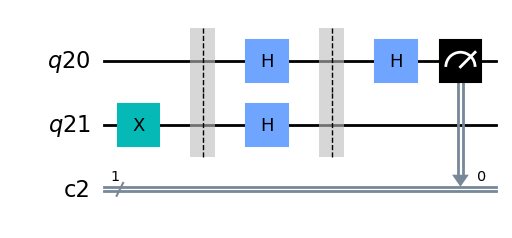

In [12]:
constant_circuit = deutsch_algorithm('constant')
constant_circuit.draw(output='mpl')

### Balanced Circuit

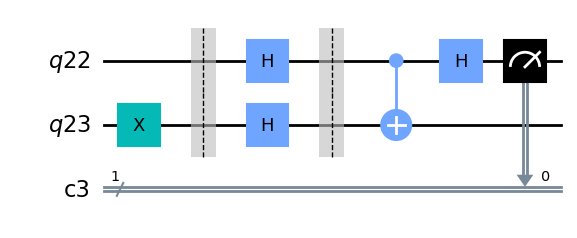

In [13]:
balanced_circuit = deutsch_algorithm('balanced')
balanced_circuit.draw(output='mpl')

### Results

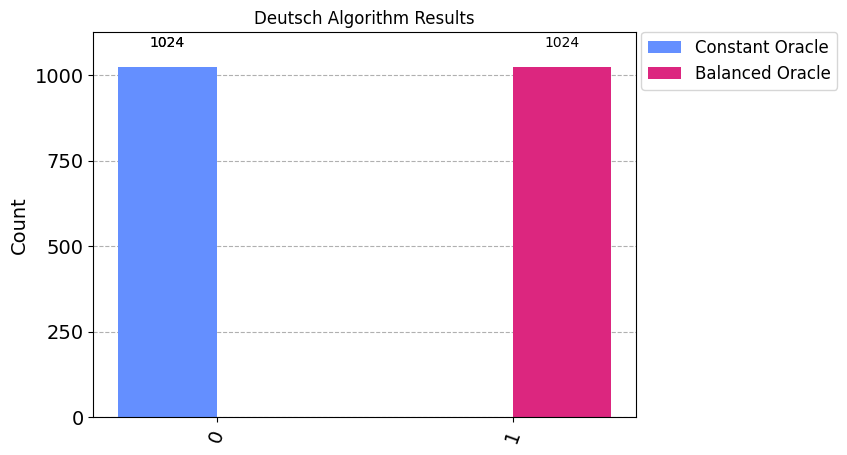

In [14]:
transpiled_constant_circuit = transpile(constant_circuit, simulator)
transpiled_balanced_circuit = transpile(balanced_circuit, simulator)

result_constant = simulator.run(transpiled_constant_circuit).result()
result_balanced = simulator.run(transpiled_balanced_circuit).result()

plot_histogram([result_constant.get_counts(), result_balanced.get_counts()],
                legend=['Constant Oracle', 'Balanced Oracle'],
                title='Deutsch Algorithm Results')

In the resulting histogram, you should observe two bars corresponding to the '0' and '1' outcomes. The heights of these bars represent the frequency of each outcome after running the algorithm multiple times.

The reason why the balanced oracle always results in a measurement of 1 (in the q0 qubit) is due to the interference pattern created by the Hadamard gates and the effect of the CNOT gate. The interference causes the amplitudes for the |0⟩ state to cancel out, leaving only the |1⟩ state for the balanced oracle. This is a distinctive feature of the Deutsch algorithm - it uses quantum interference to differentiate between constant and balanced oracles with just one query, which is not possible in classical computing.

For a constant oracle, there would be no phase difference introduced between the states, and after applying the final Hadamard gate, the interference would lead to a measurement of 0.

## The Role of Entanglement in Deutsch's Algorithm

Entanglement is a fundamental principle of quantum mechanics where the states of two or more particles become intertwined, and the state of one particle cannot be described independently of the others. In Deutsch's algorithm, entanglement plays a crucial role. The algorithm initially creates an entangled state between the qubits through the use of quantum gates. This entanglement allows the algorithm to evaluate the nature of the oracle (whether it's constant or balanced) by performing operations on these entangled qubits. The entanglement significantly contributes to the algorithm's ability to solve the problem with a single query, showcasing the power of quantum parallelism.

## Practical Applications of Deutsch's Algorithm

Deutsch's algorithm, while primarily a proof-of-concept demonstrating the potential of quantum computing, has laid the groundwork for several practical applications in various fields. These applications leverage the fundamental principles of quantum superposition and entanglement, as illustrated in the algorithm. Some practical applications:

1. Quantum Algorithm Development: Deutsch's algorithm is a stepping stone for more complex quantum algorithms. It serves as a foundational model for algorithms like Grover's and Shor's, which address more practical and significant problems like database searching and integer factorisation.

2. Quantum Circuit Testing: The algorithm provides a basic framework for testing quantum circuits. By understanding how quantum gates interact and produce specific outputs, researchers can develop more efficient quantum circuits for complex computations.

3. Quantum Cryptography: The principles demonstrated by Deutsch's algorithm, particularly in manipulating and measuring entangled quantum states, contribute to the development of quantum cryptography methods. These methods promise unparalleled security in data transmission.

4. Optimization Problems: While Deutsch's algorithm itself doesn't solve optimization problems, the approach it uses (evaluating multiple states simultaneously) inspires algorithms for solving complex optimization problems in fields like logistics, finance, and artificial intelligence.

5. Educational Tool: As one of the simplest quantum algorithms, it's an excellent educational tool for students and researchers entering the field of quantum computing. It offers a hands-on experience in understanding the basic principles of quantum mechanics and quantum computing.

# Conclusion
Deutsch's algorithm, although a relatively simple and theoretical construct, plays a vital role in the evolution of quantum computing. It's a clear demonstration of the fundamental difference between classical and quantum computation, particularly in terms of problem-solving efficiency.

The algorithm's ability to determine the nature of a binary function in a single evaluation, as opposed to the minimum two evaluations required by classical computers, exemplifies the potential for quantum computers to solve certain types of problems much more efficiently. This efficiency stems from the principles of superposition and entanglement, which are at the heart of quantum computing.

As the field of quantum computing continues to grow, the insights gained from studying and implementing Deutsch's algorithm will undoubtedly influence the development of more advanced quantum algorithms. These future algorithms are expected to tackle complex real-world problems, potentially revolutionising fields such as cryptography, financial modeling, and more.

In summary, Deutsch's algorithm is not just a theoretical curiosity but a beacon, guiding the future development of quantum computing and its applications in solving some of the most challenging problems faced by developers.

# References
- https://en.wikipedia.org/wiki/Deutsch–Jozsa_algorithm
- https://en.wikipedia.org/wiki/Quantum_computing
- https://pubs.aip.org/aip/jurp/article/32/1/100003/2908475/An-Introduction-to-Quantum-Computing
- https://github.com/ianmcloughlin/quantum-notebooks